Line plot created successfully!
Data points: 30
X-axis (Dimensions): 2.00 to 1024.00
Y-axis (Time): 0.00 to 57460.00


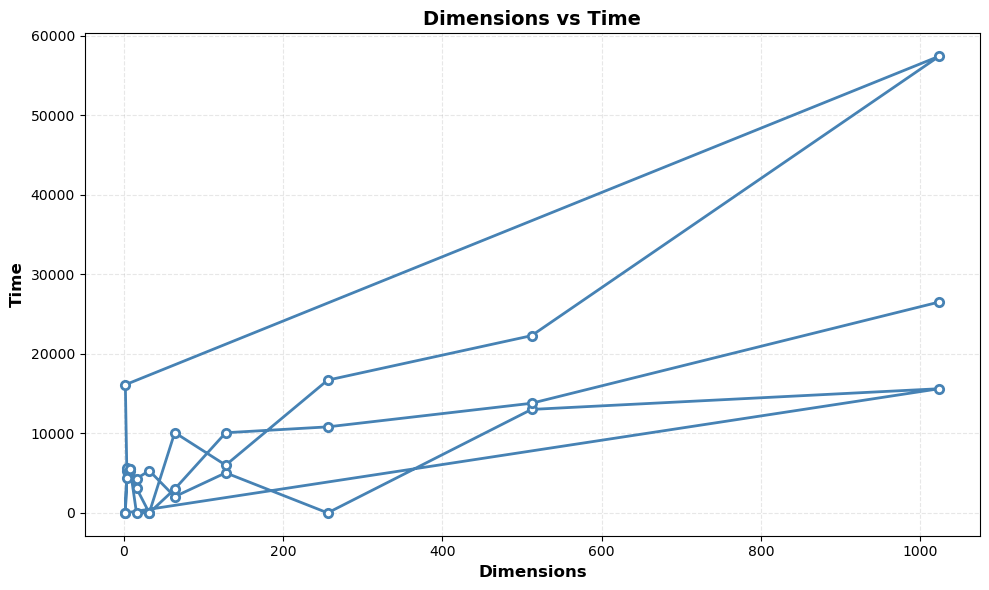

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_line_graph(csv_file_path):
    """
    Read CSV file with numeric data and create a line plot of the first two columns
    
    Parameters:
    csv_file_path (str): Path to the CSV file
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file_path)
        
        # Verify we have at least 2 columns
        if df.shape[1] < 2:
            raise ValueError("CSV file must have at least 2 columns")
        
        # Get the first two columns
        x_data = df.iloc[:, 1]  # First column (X-axis)
        y_data = df.iloc[:, 2]  # Second column (Y-axis)
        
        # Get column names
        x_label = df.columns[1]
        y_label = df.columns[2]
        
        # Verify data is numeric
        if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
            raise ValueError("First two columns must be numeric")
        
        # Create the line plot
        plt.figure(figsize=(10, 6))
        plt.plot(x_data, y_data, marker='o', linewidth=2, markersize=6, 
                color='steelblue', markerfacecolor='white', 
                markeredgecolor='steelblue', markeredgewidth=2)
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title(f'{x_label} vs {y_label}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Improve layout
        plt.tight_layout()
        
        # Display basic statistics
        print(f"Line plot created successfully!")
        print(f"Data points: {len(df)}")
        print(f"X-axis ({x_label}): {x_data.min():.2f} to {x_data.max():.2f}")
        print(f"Y-axis ({y_label}): {y_data.min():.2f} to {y_data.max():.2f}")
        
        # Show the plot
        plt.show()
        
        return df
        
    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Example usage and sample data creation
if __name__ == "__main__":
    
    df = plot_line_graph('mean_based.csv')

✓ Plotted: mean_based.csv (100 points)
✓ Plotted: median_based.csv (110 points)
Unexpected error: 'str' object has no attribute 'columns'

Example usage:
# Plot multiple CSV files as scatter plots:
csv_files = ['file1.csv', 'file2.csv', 'file3.csv']
plot_multiple_csv_scatter_plots(csv_files)

# With custom labels:
labels = ['Experiment 1', 'Experiment 2', 'Control Group']
plot_multiple_csv_scatter_plots(csv_files, labels=labels)

# Plot single file:
plot_single_csv_scatter_plot('single_file.csv')


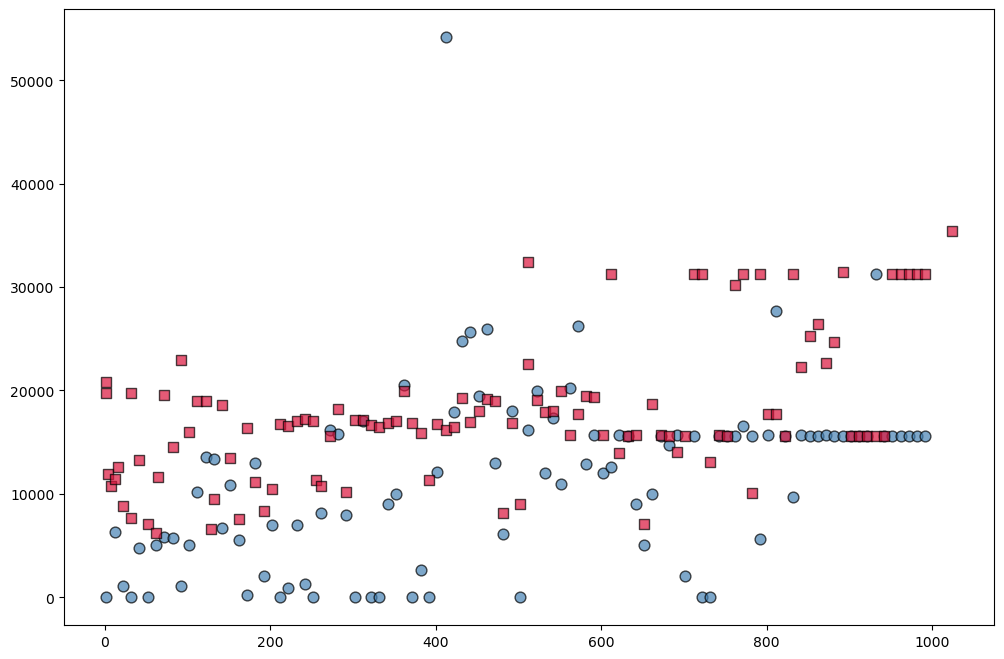

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_csv_line_graphs(csv_files, labels=None):

    try:
        # Define colors for different lines
        colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown', 'pink', 'gray']
        markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
        
        plt.figure(figsize=(12, 8))
        
        all_dataframes = []
        
        for i, csv_file in enumerate(csv_files):
            try:
                # Read the CSV file
                df = pd.read_csv(csv_file)
                
                # Verify we have at least 2 columns
                if df.shape[1] < 2:
                    print(f"Warning: '{csv_file}' has less than 2 columns. Skipping.")
                    continue
                
                # Get the first two columns
                x_data = df.iloc[:, 1]
                y_data = df.iloc[:, 2]
                
                # Verify data is numeric
                if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
                    print(f"Warning: First two columns in '{csv_file}' are not numeric. Skipping.")
                    continue
                
                # Determine label for this dataset
                if labels and i < len(labels):
                    label = labels[i]
                else:
                    label = csv_file.split('/')[-1].replace('.csv', '')  # Use filename without path and extension
                
                # Plot the line
                color = colors[i % len(colors)]
                marker = markers[i % len(markers)]
                
                # plt.plot(x_data, y_data, 
                #         marker=marker, linewidth=2, markersize=6,
                #         color=color, markerfacecolor='white',
                #         markeredgecolor=color, markeredgewidth=2,
                #         label=label, alpha=0.8)
                plt.scatter(x_data, y_data, 
                s=60, c=color, marker=marker,
                edgecolors='black', linewidth=1,
                label=label, alpha=0.7)
                all_dataframes.append((csv_file, df, df.columns[1], df.columns[2]))
                
                print(f"✓ Plotted: {csv_file} ({len(df)} points)")
                
            except FileNotFoundError:
                print(f"Error: File '{csv_file}' not found. Skipping.")
                continue
            except Exception as e:
                print(f"Error reading '{csv_file}': {str(e)}. Skipping.")
                continue
        
        if not all_dataframes:
            print("No valid data to plot!")
            return None
        
        # Use the first dataset's column names for axis labels
        first_df = all_dataframes[1][2]
        x_label = first_df.columns[1]
        y_label = first_df.columns[2]
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title('Multiple Dataset Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='best', framealpha=0.9)
        
        # Improve layout
        plt.tight_layout()
        
        # Display summary statistics
        print("\n" + "="*60)
        print("MULTI-DATASET COMPARISON SUMMARY")
        print("="*60)
        
        for csv_file, df, x_col, y_col in all_dataframes:
            print(f"\nDataset: {csv_file}")
            print(f"  Points: {len(df)}")
            print(f"  {x_col}: {df.iloc[:, 0].min():.2f} to {df.iloc[:, 0].max():.2f}")
            print(f"  {y_col}: {df.iloc[:, 1].min():.2f} to {df.iloc[:, 1].max():.2f}")
        
        print("="*60)
        
        # Show the plot
        plt.show()
        
        return all_dataframes
        
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return None


# Example usage
if __name__ == "__main__":
    
    csv_files = ['mean_based.csv', 'median_based.csv']
    custom_labels = ['mean_based ', 'median_based ']
    
    result = plot_multiple_csv_line_graphs(csv_files, labels=custom_labels)
    
    print("\nExample usage:")
    print("# Plot multiple CSV files as scatter plots:")
    print("csv_files = ['file1.csv', 'file2.csv', 'file3.csv']")
    print("plot_multiple_csv_scatter_plots(csv_files)")
    print()
    print("# With custom labels:")
    print("labels = ['Experiment 1', 'Experiment 2', 'Control Group']")
    print("plot_multiple_csv_scatter_plots(csv_files, labels=labels)")
    print()
    print("# Plot single file:")
    print("plot_single_csv_scatter_plot('single_file.csv')")

✓ Plotted: mean_based.csv (5 points)
✓ Plotted: median_based.csv (5 points)
Unexpected error: 'str' object has no attribute 'columns'

Example usage:
# Plot multiple CSV files as scatter plots:
csv_files = ['file1.csv', 'file2.csv', 'file3.csv']
plot_multiple_csv_scatter_plots(csv_files)

# With custom labels:
labels = ['Experiment 1', 'Experiment 2', 'Control Group']
plot_multiple_csv_scatter_plots(csv_files, labels=labels)

# Plot single file:
plot_single_csv_scatter_plot('single_file.csv')


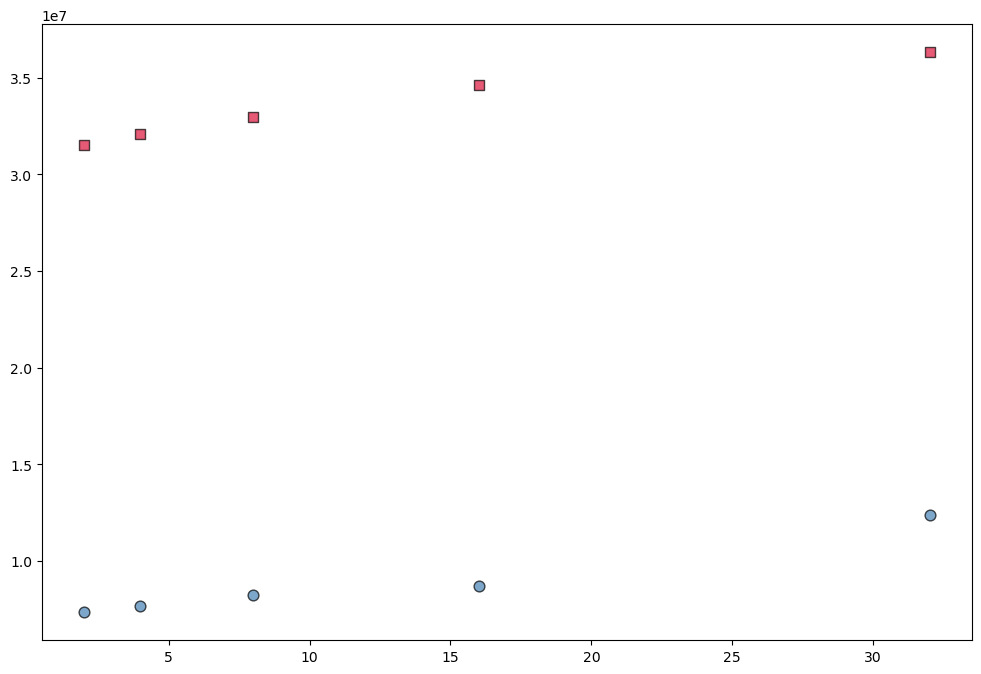

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_csv_line_graphs(csv_files, labels=None):

    try:
        # Define colors for different lines
        colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown', 'pink', 'gray']
        markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
        
        plt.figure(figsize=(12, 8))
        
        all_dataframes = []
        
        for i, csv_file in enumerate(csv_files):
            try:
                # Read the CSV file
                df = pd.read_csv(csv_file)
                
                # Verify we have at least 2 columns
                if df.shape[1] < 2:
                    print(f"Warning: '{csv_file}' has less than 2 columns. Skipping.")
                    continue
                
                # Get the first two columns
                x_data = df.iloc[:, 1]
                y_data = df.iloc[:, 2]
                
                # Verify data is numeric
                if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
                    print(f"Warning: First two columns in '{csv_file}' are not numeric. Skipping.")
                    continue
                
                # Determine label for this dataset
                if labels and i < len(labels):
                    label = labels[i]
                else:
                    label = csv_file.split('/')[-1].replace('.csv', '')  # Use filename without path and extension
                
                # Plot the line
                color = colors[i % len(colors)]
                marker = markers[i % len(markers)]
                
                # plt.plot(x_data, y_data, 
                #         marker=marker, linewidth=2, markersize=6,
                #         color=color, markerfacecolor='white',
                #         markeredgecolor=color, markeredgewidth=2,
                #         label=label, alpha=0.8)
                plt.scatter(x_data, y_data, 
                s=60, c=color, marker=marker,
                edgecolors='black', linewidth=1,
                label=label, alpha=0.7)
                all_dataframes.append((csv_file, df, df.columns[1], df.columns[2]))
                
                print(f"✓ Plotted: {csv_file} ({len(df)} points)")
                
            except FileNotFoundError:
                print(f"Error: File '{csv_file}' not found. Skipping.")
                continue
            except Exception as e:
                print(f"Error reading '{csv_file}': {str(e)}. Skipping.")
                continue
        
        if not all_dataframes:
            print("No valid data to plot!")
            return None
        
        # Use the first dataset's column names for axis labels
        first_df = all_dataframes[1][2]
        x_label = first_df.columns[1]
        y_label = first_df.columns[2]
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title('Multiple Dataset Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='best', framealpha=0.9)
        
        # Improve layout
        plt.tight_layout()
        
        # Display summary statistics
        print("\n" + "="*60)
        print("MULTI-DATASET COMPARISON SUMMARY")
        print("="*60)
        
        for csv_file, df, x_col, y_col in all_dataframes:
            print(f"\nDataset: {csv_file}")
            print(f"  Points: {len(df)}")
            print(f"  {x_col}: {df.iloc[:, 0].min():.2f} to {df.iloc[:, 0].max():.2f}")
            print(f"  {y_col}: {df.iloc[:, 1].min():.2f} to {df.iloc[:, 1].max():.2f}")
        
        print("="*60)
        
        # Show the plot
        plt.show()
        
        return all_dataframes
        
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return None


# Example usage
if __name__ == "__main__":
    
    csv_files = ['mean_based.csv', 'median_based.csv']
    custom_labels = ['mean_based ', 'median_based ']
    
    result = plot_multiple_csv_line_graphs(csv_files, labels=custom_labels)
    
    print("\nExample usage:")
    print("# Plot multiple CSV files as scatter plots:")
    print("csv_files = ['file1.csv', 'file2.csv', 'file3.csv']")
    print("plot_multiple_csv_scatter_plots(csv_files)")
    print()
    print("# With custom labels:")
    print("labels = ['Experiment 1', 'Experiment 2', 'Control Group']")
    print("plot_multiple_csv_scatter_plots(csv_files, labels=labels)")
    print()
    print("# Plot single file:")
    print("plot_single_csv_scatter_plot('single_file.csv')")

Dataset mean_based: Grouped 100 points into 10 groups
Dataset median-based: Grouped 101 points into 11 groups
Dataset ball_tree: Grouped 100 points into 10 groups
Dataset lsh_euclidean: Grouped 100 points into 10 groups


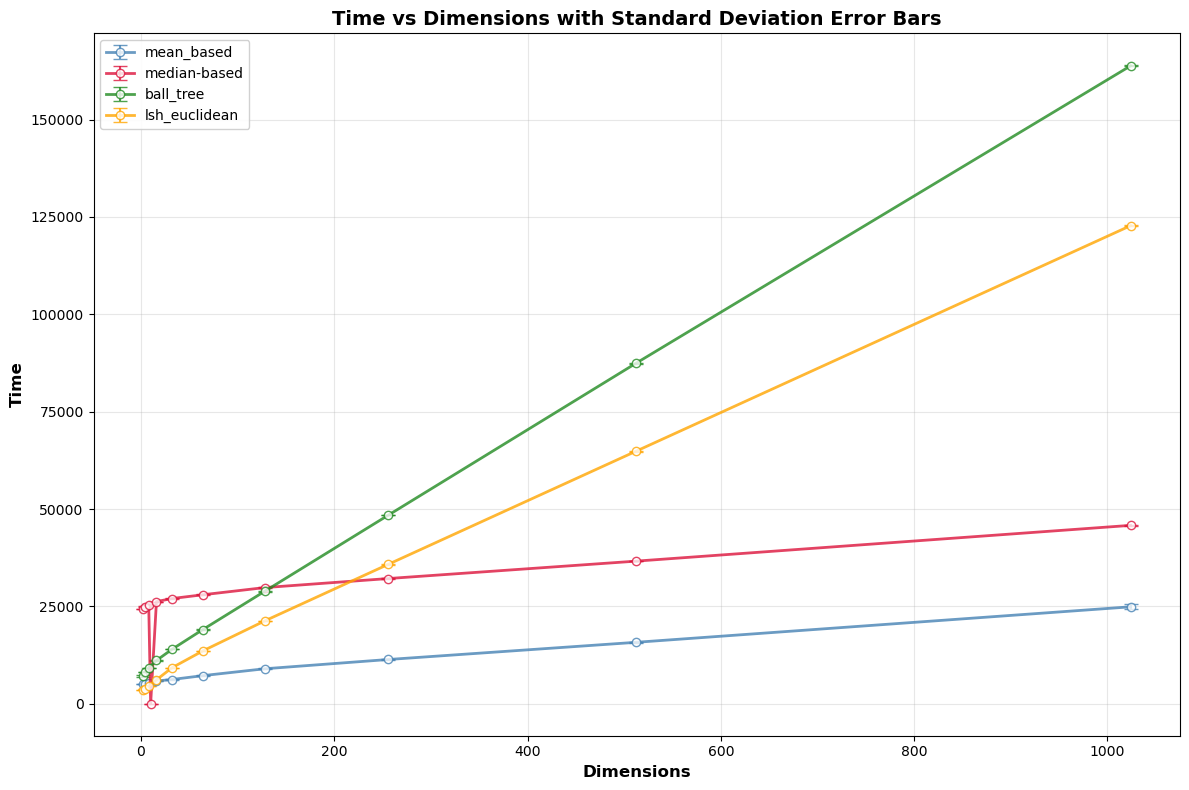

Dataset mean_based: Grouped 100 points into 10 groups
Dataset median-based: Grouped 101 points into 11 groups
Dataset ball_tree: Grouped 100 points into 10 groups
Dataset lsh_find_point: Grouped 100 points into 10 groups


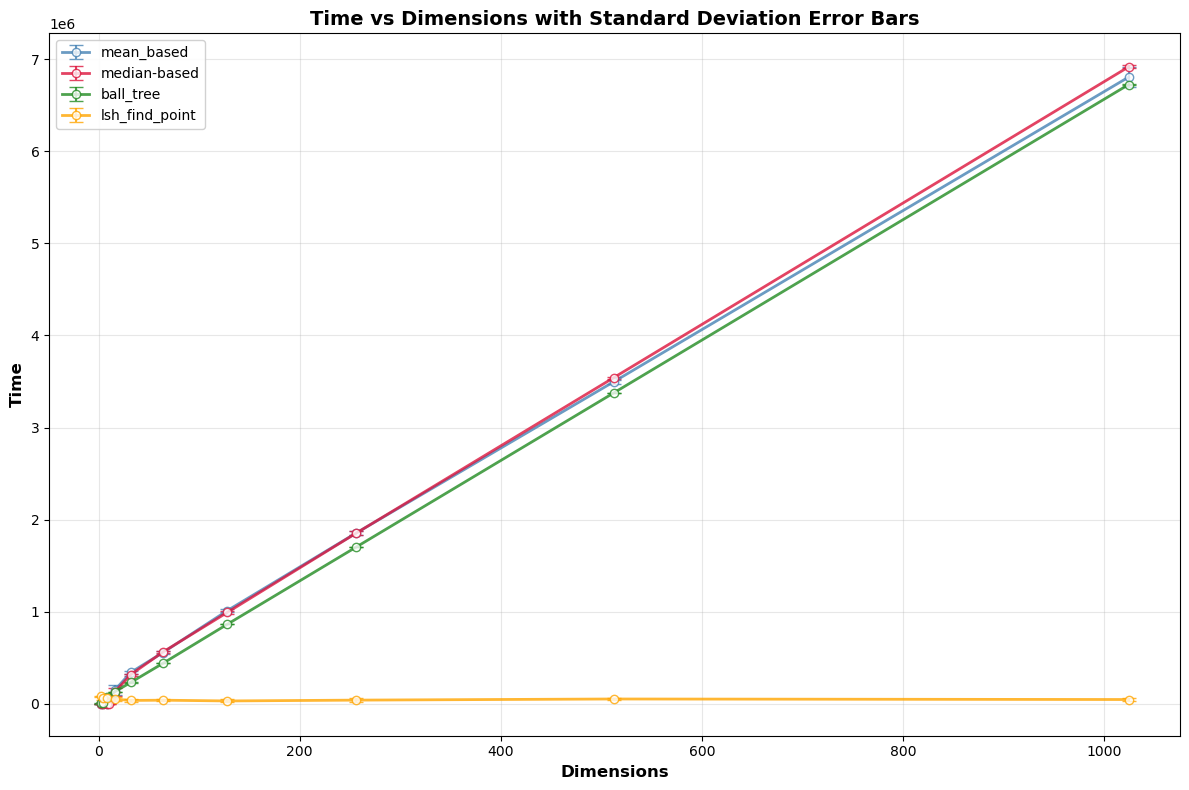

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def plot_multiple_with_std_error_bars(csv_files, labels=None, x_col=1, y_col=2, group_by_x=True):
    """
    Plot multiple datasets with standard deviation error bars
    
    Parameters:
    csv_files (list): List of paths to CSV files
    labels (list): Optional list of labels for each dataset
    x_col (int): Column index for x-axis (default: 1)
    y_col (int): Column index for y-axis (default: 2) 
    group_by_x (bool): If True, groups by x values and calculates std for each group
    """
    try:
        plt.figure(figsize=(12, 8))
        
        # Define colors for different datasets
        colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown']
        
        for i, csv_file in enumerate(csv_files):
            # Read CSV file
            df = pd.read_csv(csv_file)
            
            if df.shape[1] < 2:
                print(f"Warning: {csv_file} must have at least 2 columns. Skipping.")
                continue
            
            color = colors[i % len(colors)]
            label = labels[i] if labels and i < len(labels) else csv_file.split('/')[-1].replace('.csv', '')
            
            if group_by_x:
                # Group by x values and calculate mean and std for each group
                grouped = df.groupby(df.iloc[:, x_col])[df.columns[y_col]]
                x_grouped = grouped.mean().index
                y_mean = grouped.mean().values
                y_std = grouped.std().values
                
                # Handle NaN values
                y_std = np.nan_to_num(y_std, nan=0.0)
                
                plt.errorbar(x_grouped, y_mean, yerr=y_std, 
                           marker='o', markersize=6, capsize=5, capthick=1.5,
                           linewidth=2, elinewidth=1.5, markeredgewidth=1,
                           color=color, markerfacecolor='white',
                           markeredgecolor=color, label=label,
                           alpha=0.8)
                
                print(f"Dataset {label}: Grouped {len(df)} points into {len(x_grouped)} groups")
        
        # Use the last dataset for labels (or first dataset if available)
        x_label = df.columns[x_col]
        y_label = df.columns[y_col]
        
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title(f'{y_label} vs {x_label} with Standard Deviation Error Bars', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best', framealpha=0.9)
        plt.tight_layout()
        plt.show()
        
        return True
        
    except Exception as e:
        print(f"Error: {e}")
        return False


if __name__ == "__main__":
    csv_files = ["mean_based.csv", "median_based.csv","ball_tree.csv","lsh_euclidean.csv"]
    labels = ["mean_based","median-based","ball_tree"]
    plot_multiple_with_std_error_bars(csv_files,labels=labels)
    csv_files_find_point = ["mean_based_find_point.csv", "median_based_find_point.csv","ball_tree_find_point.csv","lsh_find_point.csv"]
    plot_multiple_with_std_error_bars(csv_files_find_point,labels=labels)
    # plot_with_std_error_bars('mean_based.csv', group_by_x=True)
    # plot_with_std_error_bars('mean_based_find_point.csv', group_by_x=True)
    # plot_with_std_error_bars('median_based.csv', group_by_x=True)
    # plot_with_std_error_bars('median_based_find_point.csv', group_by_x=True)
    
    